In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
import re 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import json
wordnet_lemmatizer = WordNetLemmatizer()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zxy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
stop_words=list(set(stop_words))

In [4]:
arti=pd.read_csv('nyt-articles-2020.csv')

In [5]:
len(arti)

16787

In [ ]:
############# read comments ###################

In [8]:
com=pd.read_csv('nyt-comments-2020.csv',low_memory=False)

In [9]:
com.columns

Index(['commentID', 'status', 'commentSequence', 'userID', 'userDisplayName',
       'userLocation', 'userTitle', 'commentBody', 'createDate', 'updateDate',
       'approveDate', 'recommendations', 'replyCount', 'editorsSelection',
       'parentID', 'parentUserDisplayName', 'depth', 'commentType', 'trusted',
       'recommendedFlag', 'permID', 'isAnonymous', 'articleID'],
      dtype='object')

In [ ]:
############## filter all comments for opinion articles ##################

In [ ]:
### merge comments with whole articles #####

In [11]:
artiCom=arti.merge(com, how='left',left_on='uniqueID',right_on='articleID')

In [ ]:
### filter comments of Science artile #####

In [12]:
World_Com=artiCom[artiCom['section']=='World']

In [13]:
len(World_Com)

284874

In [349]:
#######clean comments for Science article#########

In [14]:
with open('contraction_map.json', 'r') as fp:
    contraction_map = json.load(fp) 
punc='"#$%&\'()*+,-./:;<=>@[\\]^_`{|}~\n?!'
stopwords=list(set(stop_words))
def clean(sentence):
    s=' '.join((contraction_map.get(word, word) for word in sentence.split(' ')))
    s2=''.join([char for char in s if char not in punc])
    lem=[wordnet_lemmatizer.lemmatize(word, pos="v") for word in s2.split(' ')]
    wordlist=[word for word in lem if word.lower() not in stopwords and word.isalpha()]# word list
    a=' '.join(wordlist)
    return a

In [15]:
World_Com['clean_com']=World_Com.commentBody.apply(lambda x: clean(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
World_Com.head(2)

,newsdesk,section,subsection,material,headline,abstract,keywords,word_count,pub_date,n_comments,...,parentID,parentUserDisplayName,depth,commentType,trusted,recommendedFlag,permID,isAnonymous,articleID,clean_com
476,Foreign,World,Middle East,News,Pro-Iranian Protesters End Siege of U.S. Embas...,Iran’s ability to deploy militias to attack th...,"['Iraq', 'Iran', 'United States', 'Demonstrati...",1120,2020-01-01 09:25:54+00:00,123,...,NaN,NaN,1,comment,0,0,104398636,False,nyt://article/ac742403-9ccd-522f-9a1e-a90feb6c...,credible evidence tie Iran state Administratio...
477,Foreign,World,Middle East,News,Pro-Iranian Protesters End Siege of U.S. Embas...,Iran’s ability to deploy militias to attack th...,"['Iraq', 'Iran', 'United States', 'Demonstrati...",1120,2020-01-01 09:25:54+00:00,123,...,104398636.0,Olenska,2,userReply,0,0,104399008,False,nyt://article/ac742403-9ccd-522f-9a1e-a90feb6c...,Olenska could agree us learn


In [ ]:
######################## draw elbow plot for clustering ##########################

In [17]:
#vectorizer = TfidfVectorizer()
#vectorizer_matrix = vectorizer.fit_transform(World_Com['clean_com'].astype(str).values)

In [356]:
#wcss=[]
#for i in range(1,5): 
#    kmeans = KMeans(n_clusters=i,random_state=0)
#    kmeans.fit(vectorizer_matrix)
#    wcss.append(kmeans.inertia_)

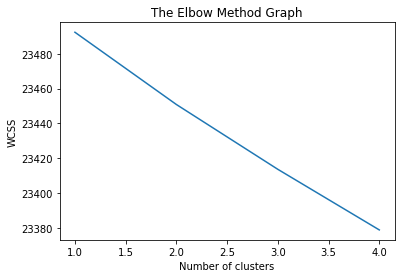

In [357]:
#plt.plot(range(1,5),wcss)
#plt.title('The Elbow Method Graph')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [374]:
#def showElbow(data, rangeBegin,rangeEnd):
#    wcss=[]
#    for i in range(rangeBegin,rangeEnd): 
#        kmeans = KMeans(n_clusters=i,random_state=0)
#        kmeans.fit(data)
#        wcss.append(kmeans.inertia_)
#    plt.plot(range(rangeBegin,rangeEnd),wcss)
#    plt.title('The Elbow Method Graph')
#    plt.xlabel('Number of clusters')
#    plt.ylabel('WCSS')
#    plt.show()
#    print('k range:',rangeBegin,rangeEnd)

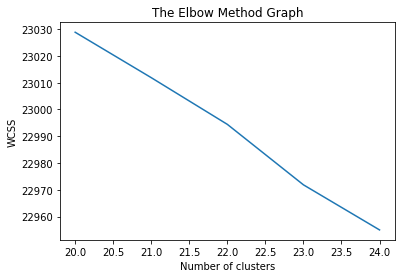

k range: 20 25


In [375]:
#showElbow(vectorizer_matrix, 20,25)

In [379]:
#def showElbow(data, k_list):
#    wcss=[]
#    for i in k_list: 
#        kmeans = KMeans(n_clusters=i,random_state=0)
#        kmeans.fit(data)
#        wcss.append(kmeans.inertia_)
#    plt.plot(k_list,wcss)
#    plt.title('The Elbow Method Graph')
#    plt.xlabel('Number of clusters')
#    plt.ylabel('WCSS')
#    plt.show()
#    print('k range:',k_list)

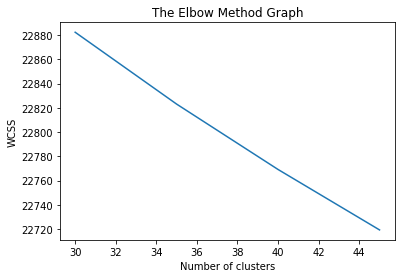

k range: [30, 35, 40, 45]


In [380]:
#showElbow(vectorizer_matrix, [30,35,40,45]) #try k=30,35,40,45

In [381]:
################################## silhouette score ######################################
from sklearn.metrics import silhouette_score
def get_silScore(data, rangeStart, rangeEnd):
    silhouette_num = []
    for n_clusters in range(rangeStart, rangeEnd):
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(data)
        #centers = clusterer.cluster_centers_
        score = silhouette_score(data, preds)
        silhouette_num.append(score)
        print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

In [382]:
#get_silScore(vectorizer_matrix, 2, 4)

For n_clusters = 2, silhouette score is 0.0010813347763748635)
For n_clusters = 3, silhouette score is 0.0011503561833901264)


In [383]:
get_silScore(vectorizer_matrix, 100, 110)

For n_clusters = 100, silhouette score is 0.009059359971767338)
For n_clusters = 101, silhouette score is 0.009883284053627333)
For n_clusters = 102, silhouette score is 0.009558718702431603)
For n_clusters = 103, silhouette score is 0.009739047359377025)
For n_clusters = 104, silhouette score is 0.009383862461297915)
For n_clusters = 105, silhouette score is 0.009786124676987328)
For n_clusters = 106, silhouette score is 0.00974007510376393)
For n_clusters = 107, silhouette score is 0.009800426424243943)
For n_clusters = 108, silhouette score is 0.009902597865215393)
For n_clusters = 109, silhouette score is 0.009943275261134785)


In [18]:
#from sklearn.metrics import silhouette_score
#def get_SilScore(data, k_list):
#    silhouette_num = []
#    for n_clusters in k_list:
#        clusterer = KMeans(n_clusters=n_clusters)
#        preds = clusterer.fit_predict(data)
        #centers = clusterer.cluster_centers_
#        score = silhouette_score(data, preds)
#        silhouette_num.append(score)
#        print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

In [386]:
#get_SilScore(vectorizer_matrix, [2,3])

For n_clusters = 2, silhouette score is 0.001007770275400211)
For n_clusters = 3, silhouette score is 0.0011398218387683402)


In [19]:
#get_SilScore(vectorizer_matrix, [1100,1200,1300]) # list: try k=200,300,400,500

MemoryError: Unable to allocate 2.33 GiB for an array with shape (284874, 1100) and data type float64

In [ ]:
############################### best number of clustering is n ############################

In [392]:
num_clusters = 1000 #need to change to the best k we got from above code
km = KMeans(n_clusters=num_clusters)
%time km.fit(vectorizer_matrix)
clusters = km.labels_.tolist()

Wall time: 7min 31s


In [ ]:
#clusters=clusterer.labels_.tolist()
#World_Com['cluster']=clusters
#result=World_Com.groupby('articleID').cluster.nunique()
#result.to_csv('cluster result.csv')

In [393]:
len(clusters)==len(World_Com)

True

In [394]:
############ add cluster number to sci comments dataframe ####################################
World_Com['cluster']=clusters

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [395]:
World_Com.head(2)

,newsdesk,section,subsection,material,headline,abstract,keywords,word_count,pub_date,n_comments,...,parentUserDisplayName,depth,commentType,trusted,recommendedFlag,permID,isAnonymous,articleID,clean_com,cluster
476,Foreign,World,Middle East,News,Pro-Iranian Protesters End Siege of U.S. Embas...,Iran’s ability to deploy militias to attack th...,"['Iraq', 'Iran', 'United States', 'Demonstrati...",1120,2020-01-01 09:25:54+00:00,123,...,NaN,1,comment,0,0,104398636,False,nyt://article/ac742403-9ccd-522f-9a1e-a90feb6c...,credible evidence tie Iran state Administratio...,0
477,Foreign,World,Middle East,News,Pro-Iranian Protesters End Siege of U.S. Embas...,Iran’s ability to deploy militias to attack th...,"['Iraq', 'Iran', 'United States', 'Demonstrati...",1120,2020-01-01 09:25:54+00:00,123,...,Olenska,2,userReply,0,0,104399008,False,nyt://article/ac742403-9ccd-522f-9a1e-a90feb6c...,Olenska could agree us learn,3


In [368]:
################## count how many clusters the comments of each article contain ###########################

In [ ]:
result=World_Com.groupby('articleID').cluster.nunique()

In [397]:
result.head(20)# column= artileID, number of topics the comments of this article have

articleID
nyt://article/00c2d2a5-85d6-5dbb-ae5d-fbb430bcd014    3
nyt://article/00d739ea-0abb-5939-899e-d7bd1999f516    4
nyt://article/00dfd8ea-2d07-5f18-b8e1-3570f09e45e8    4
nyt://article/00e3dfa6-82b3-5825-bf8a-c144ac1ac0a0    4
nyt://article/00ff0943-553d-5afe-b98a-0fba5d736efe    2
nyt://article/012512d1-4deb-5fae-a6d4-8b101314a414    1
nyt://article/0127350f-4c30-5c4c-a9f2-42d3d905d065    4
nyt://article/016cf3b3-56e9-53e4-882c-549209211afb    4
nyt://article/01bccb26-a950-591e-80ba-6ab491d2ca63    4
nyt://article/01d1cf98-08db-5f7c-aad2-435b40fab2d7    1
nyt://article/0292c32c-b54c-5703-bad8-03afbce5588e    3
nyt://article/02ab48eb-8502-526c-8b28-497b74368648    3
nyt://article/02bb8258-a569-5c65-8ea8-e2bdd2178653    4
nyt://article/02bc9d31-b32f-5e87-9793-f602feb3232c    3
nyt://article/0302d690-bc07-5c98-bc0d-5c002e51f5e2    4
nyt://article/032186fa-9b3c-5b5a-b53e-091c35fab634    4
nyt://article/03532bb2-2ebe-5357-8297-f079a4cdcea9    3
nyt://article/0406c5e5-ab64-5829-92f1-

In [ ]:
result.to_csv('cluster result.csv')

In [ ]:
################ normalize the number of topics ###############################